## 1-Data Processing

In [41]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import copy
import math

In [42]:
# Importing the dataset
dataset = pd.read_csv('Salary_dataset.csv')

# Viewing the dataset
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [43]:
# Drop the unnamed column
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
# Viewing the dataset
dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [45]:
# Cheecking for missing values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## 2- Data Visualization

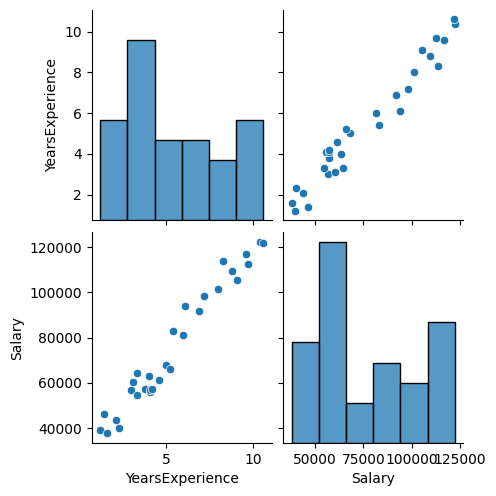

In [46]:
# Visualizing the dataset
sns.pairplot(dataset)
plt.show()


corr: 0.9782416184887599


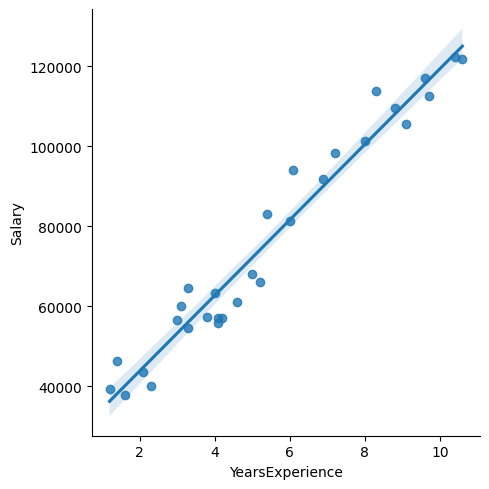

In [47]:
# Estimating the correlation and visualizing regression fit
corr = dataset["YearsExperience"].corr(dataset["Salary"])
print(f"corr: {corr}")
sns.lmplot(x='YearsExperience', y='Salary', data=dataset)
plt.show()

## 2- Finding the model

In [48]:
x_train = dataset['YearsExperience']
y_train = dataset['Salary']

### a- Defining functions

In [67]:
# Prediction function
def predict(x, w, b):
    """
    Predicts the value of y given x, w, and b.
    param x: a single value of x
    param w: the weight
    param b: the bias
    return: the predicted value of y
    """
    return w * x + b


# Compute cost function
def compute_cost(x, y, w, b):
    """
    Computes the cost of using w and b as the coefficients for the model.
    param x: the input values
    param y: the true values
    param w: the weight
    param b: the bias
    return: the cost of using w and b as coefficients
    """
    n = y.shape[0]
    predictions = w * x + b
    total_cost = (1/2*n) * sum([val**2 for val in (y - predictions)])
    
    return total_cost


# Compute gradient function
def compute_gradient(x, y, w, b):
    """
    Computes the gradient of the cost with respect to w and b.
    param x: the input values
    param y: the true values
    param w: the weight
    param b: the bias
    return: the gradient of the cost with respect to w, the gradient of the cost with respect to b
    """
    n = y.shape[0]
    
    dj_dw = 0
    dj_db = 0
    for i in range(n):
        err = predict(x[i], w, b) - y[i]
        dj_dw += err * x[i]
        dj_db += err
    dj_dw /= n
    dj_db /= n

    return dj_dw, dj_db


# Gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    """"
    Performs num_iters iterations of gradient descent to minimize the cost function.
    param x: the input values
    param y: the true values
    param w_in: the initial weight
    param b_in: the initial bias
    param alpha: the learning rate
    param num_iters: the number of iterations
    return: the final weight, the final bias, the cost at each iteration, the weights at each iteration
    """

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate gradient
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Updata w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save the cost J at each iteration
        if i < 10000:    # prevent memory overflow
            J_history.append(compute_cost(x, y, w, b))
            w_history.append(w)
            
        # Print cost every at intervels 10 times or as many iteration if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4} - Cost: {J_history[-1]:8.2f}")

    return w, b, J_history, w_history

### b- Finding the optimal value of the learning rate

Alpha = 1e-4
Iteration    0 - Cost: 2904748827135.05
Iteration  150 - Cost: 973356044301.05
Iteration  300 - Cost: 354633511561.60
Iteration  450 - Cost: 156286541616.91
Iteration  600 - Cost: 92563430820.56
Iteration  750 - Cost: 71954006599.87
Iteration  900 - Cost: 65152710779.34
Iteration 1050 - Cost: 62774617177.68
Iteration 1200 - Cost: 61814255299.99
Iteration 1350 - Cost: 61309134788.58

Alpha = 1e-5
Iteration    0 - Cost: 2924229632800.90
Iteration  150 - Cost: 2616855736919.22
Iteration  300 - Cost: 2342505963938.13
Iteration  450 - Cost: 2097631865428.96
Iteration  600 - Cost: 1879066274652.88
Iteration  750 - Cost: 1683982337745.81
Iteration  900 - Cost: 1509856947013.01
Iteration 1050 - Cost: 1354438103325.51
Iteration 1200 - Cost: 1215715785435.40
Iteration 1350 - Cost: 1091895949390.62


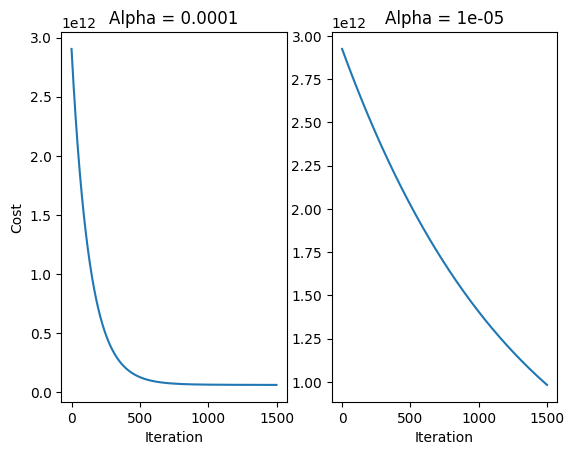

In [87]:
# Trying alpha = 1e-4 and alpha = 1e-5 for number of iterations = 1500
j_history = []
w_history = []
print("Alpha = 1e-4")
result = gradient_descent(x_train, y_train, 0, 0, 1e-4, 1500)
j_history.append(result[2])
w_history.append(result[3])

print("\nAlpha = 1e-5")
result = gradient_descent(x_train, y_train, 0, 0, 1e-5, 1500)
j_history.append(result[2])
w_history.append(result[3])

# Plotting the cost function
_, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].plot(j_history[i])
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"Alpha = {1e-4 if i == 0 else 1e-5}")
ax[0].set_ylabel("Cost")
plt.show()



On the right, the coast function is decreasing quickly. There is a higher risk of overshooting the global minimum, leading to oscillations or even divergence. Therefore we'll take alpha=1e-4 which seems to be more stable even though it can take a bit more time 

### c- Finding the model and visualizing the result

Iteration    0 - Cost: 2904748827135.05
Iteration  150 - Cost: 973356044301.05
Iteration  300 - Cost: 354633511561.60
Iteration  450 - Cost: 156286541616.91
Iteration  600 - Cost: 92563430820.56
Iteration  750 - Cost: 71954006599.87
Iteration  900 - Cost: 65152710779.34
Iteration 1050 - Cost: 62774617177.68
Iteration 1200 - Cost: 61814255299.99
Iteration 1350 - Cost: 61309134788.58
f(x) = 12675.193693433863x + 2572.4719911310713


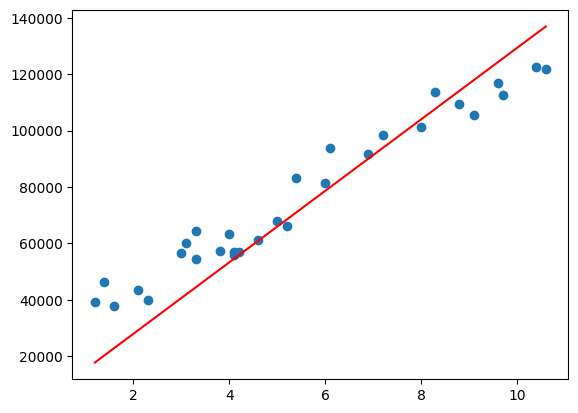

In [88]:
alpha = 1e-4
num_iters = 1500
w_in = 0
b_in = 0
result = gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters)
w = result[0]
b = result[1]
print(f"f(x) = {w}x + {b}")
plt.scatter(x_train, y_train)
plt.plot(x_train, w*x_train + b, color='red')
plt.show()

## 3- Predicting the salary after 25 and 30 years experience

In [91]:
y_25 = predict(25, w, b)
print(f"Predicted salary for 25 years of experience: {y_25:.2f}")
y_30 = predict(30, w, b)
print(f"Predicted salary for 30 years of experience: {y_30:.2f}")

Predicted salary for 25 years of experience: 319452.31
Predicted salary for 30 years of experience: 382828.28
